49, 58, 75, 110, 112, 132, 151, 276, 281, 362*
 

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы H0:medX=200 на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет.

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [1]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# initialize list of lists 
data = [[49], [58], [75], [110], [112], [132], [151], [276], [281], [362]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['days']) 
  
# print dataframe. 
df 

,days
0,49
1,58
2,75
3,110
4,112
5,132
6,151
7,276
8,281
9,362


$H_0\colon$ медиана дожития равна 200 дней

$H_1\colon$ медиана дожития не равна 200 дней

In [5]:
print ("M: %d, p-value: %f" % sign_test(df, 200))

M: -2, p-value: 0.343750


In [6]:
m0 = 200
stats.wilcoxon(df.days - m0)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15

и в 9 лесах, где идёт вырубка:

17, 18, 18, 15, 12, 4, 14, 15, 10.

Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [12]:
# initialize list of lists 
data = [['N',22],['N',22],['N',15],['N',13],['N',19],['N',19],['N',18],['N',20],['N',21],['N',13],['N',13],['N',15]
       ,['Y',17],['Y',18],['Y',18],['Y',15],['Y',12],['Y',4],['Y',14],['Y',15],['Y',10]]
  
# Create the pandas DataFrame 
cutting_df = pd.DataFrame(data, columns = ['cutting', 'qnt'])
cutting_df

,cutting,qnt
0,N,22
1,N,22
2,N,15
3,N,13
4,N,19
5,N,19
6,N,18
7,N,20
8,N,21
9,N,13


In [13]:
cuttingN = cutting_df[cutting_df['cutting']  == 'N'].qnt
cuttingY = cutting_df[cutting_df['cutting']  == 'Y'].qnt
cuttingN

0     22
1     22
2     15
3     13
4     19
5     19
6     18
7     20
8     21
9     13
10    13
11    15
Name: qnt, dtype: int64

In [14]:
stats.mannwhitneyu(cuttingN, cuttingY)

MannwhitneyuResult(statistic=27.0, pvalue=0.02900499272087373)

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
сделайте по 1000 псевдовыборок из каждой выборки.

In [3]:
orings = pd.read_csv('h:\\MyProj\\Courcera\\Ml-mipt\\course4\\week2b\\work\\challenger.txt', sep = '\t', header = 0)

In [4]:
orings.shape

(23, 3)

In [5]:
orings.head()

,Date,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [6]:
incident0 = orings[orings['Incident']  == 0].Temperature
incident1 = orings[orings['Incident']  == 1].Temperature

In [7]:
incident1

1     21.1
8     13.9
9     17.2
10    21.1
13    11.7
20    23.9
22    14.4
Name: Temperature, dtype: float64

In [37]:
def permutation_t_stat_1sample(sample, mean):
#    t_stat = sum(map(lambda x: x - mean, sample))
    t_stat = sum(sample - mean)
    return t_stat

In [38]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = sample - mean
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

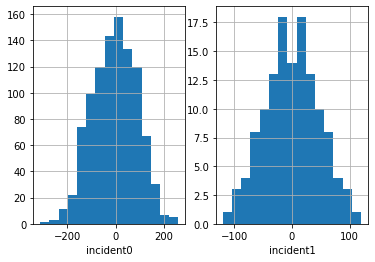

In [48]:
pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(permutation_zero_distr_1sample(incident0, 0.5, 1000), bins = 15)
pylab.xlabel('incident0')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(permutation_zero_distr_1sample(incident1, 0.5, 1000), bins = 15)
pylab.xlabel('incident1')

pylab.show()

In [46]:
def permutation_test_1sample(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [143]:
print ("p-value: %f" % permutation_test_1sample(incident1, 13.0499, 1000))

p-value: 0.046875


In [124]:
#np.random.seed(0)

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [30]:
#np.random.seed(0)

In [8]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [17]:
def get_random_combinations(n1, n2, max_combinations):
    np.random.seed(0)
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [10]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

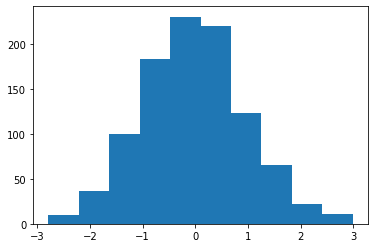

In [34]:
pylab.hist(permutation_zero_dist_ind(incident0, incident0, max_combinations = 1000))
pylab.show()

In [11]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [19]:
print("p-value: %f" % permutation_test(incident0, incident1, max_permutations = 10000))

p-value: 0.007000
